In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import riesling as rl

In [3]:
mat = 80
snr = 50
nchan = 4
recon = '--toe --sense=kernels-sense.h5 --sdc=kernels-sdc.h5 --max_its=8 --os=2.5'
!riesling phantom kernels --shepp_logan --matrix={mat} --snr={snr} --channels={nchan}
!riesling sdc --sdc=pipe kernels.h5
!riesling sense-calib --sdc=kernels-sdc.h5 kernels.h5 --fov=256

!riesling cg {recon} --kernel=NN kernels.h5 -o NN

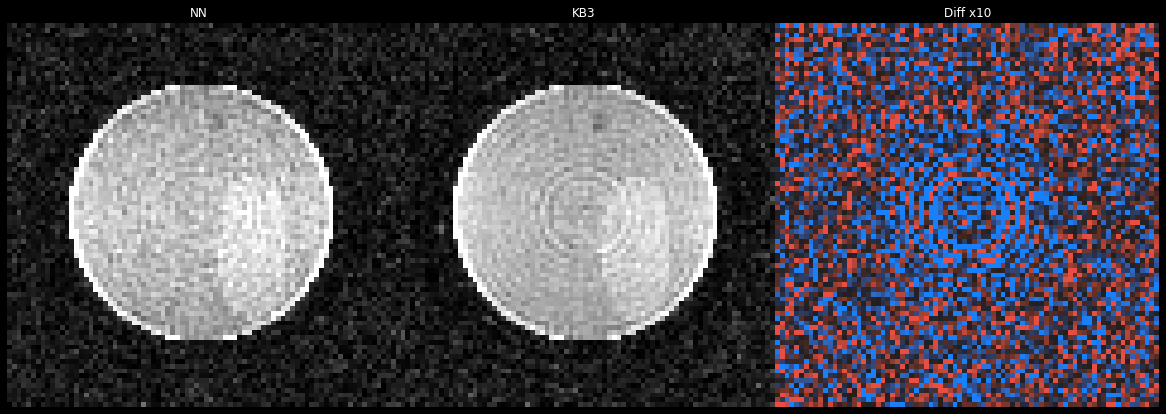

In [10]:
!riesling cg {recon} --kernel=KB3 kernels.h5 -o KB3
rl.images.diff('NN-cg.h5', 'KB3-cg.h5', title1='NN', title2='KB3', diffscale=10)

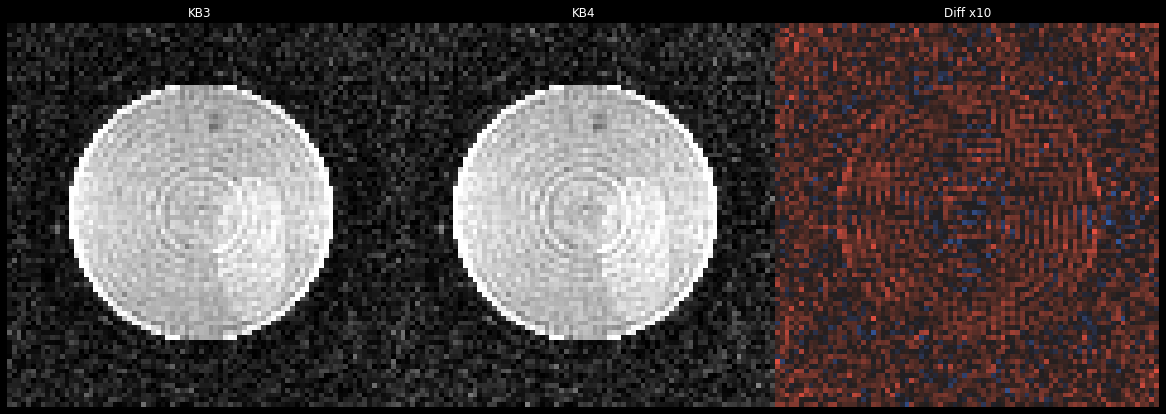

In [11]:
!riesling cg {recon} --kernel=KB4 kernels.h5 -o KB4
rl.images.diff('KB3-cg.h5', 'KB4-cg.h5', title1='KB3', title2='KB4', diffscale=10)

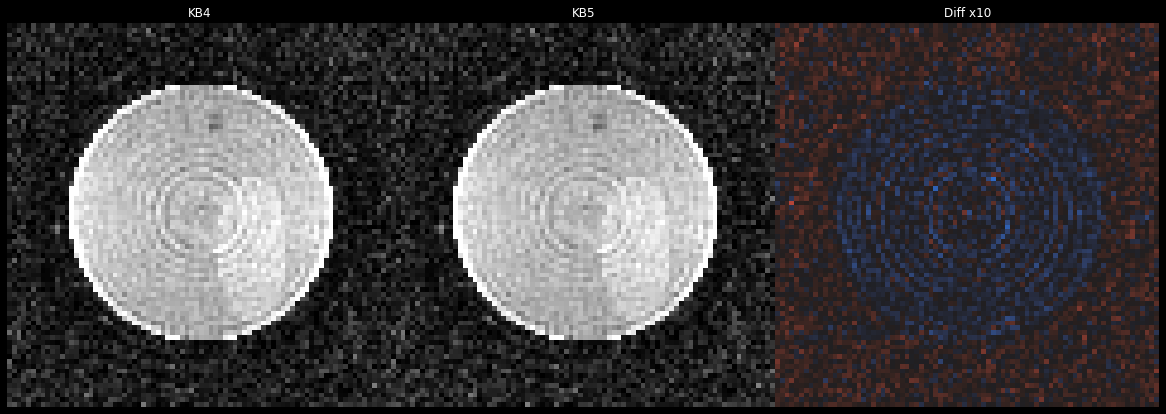

In [12]:
!riesling cg {recon} --kernel=KB5 kernels.h5 -o KB5
rl.images.diff('KB4-cg.h5', 'KB5-cg.h5', title1='KB4', title2='KB5', diffscale=10)

Starting: cg
Read wisdom successfully from "/Users/tobias/.riesling-wisdom"
Opened file kernels.h5 for reading
Read dataset: trajectory
Read dataset: echoes
Created trajectory object with 6400 spokes
Generating mapping to grid size 160 at 3 mm effective resolution
Generated 510874 co-ordinates in 75 ms
Echo weights: 1
Opened file kernels-sdc.h5 for reading
Read dataset: trajectory
Read dataset: echoes
Created trajectory object with 6400 spokes
Opened file kernels-sense.h5 for reading
Planning 4 160x160x160 FFTs with 6 threads
Planning 1 160x160x160 FFTs with 6 threads
Reverse FFT
Apodization size 84,84,84 scale factor: 2023.8577
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...100%...0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...100%...Combining thread workspaces...
Reading non-cartesian volume 0
0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...100%...Combining thread workspaces...
Reverse FFT
Starting Conjugate Gradients, threshold 1e-10
Forward FFT
Re

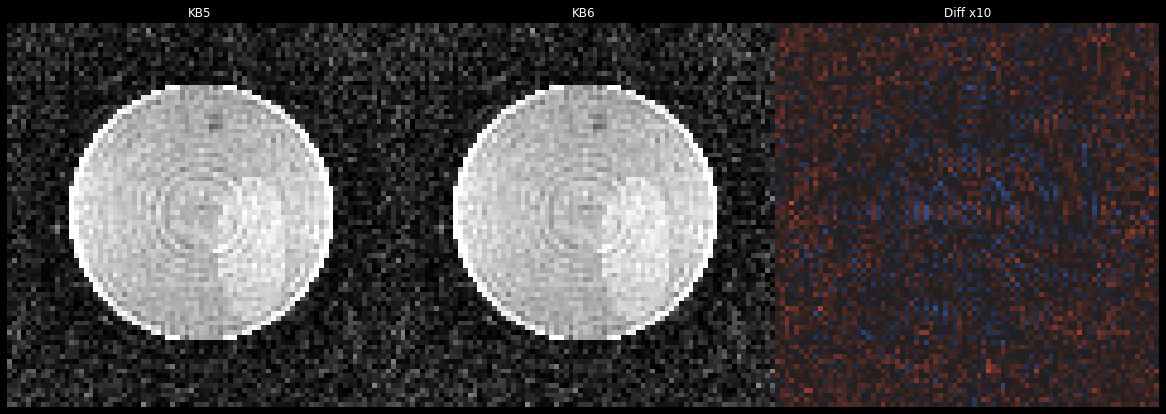

In [14]:
!riesling cg {recon} --kernel=KB6 kernels.h5 -o KB6 -v
rl.images.diff('KB5-cg.h5', 'KB6-cg.h5', title1='KB5', title2='KB6', diffscale=10)